In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data = pd.read_csv('cwurData.csv', sep=",")
data.head()

world_rank                            institution         country  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5     California Institute of Technology             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0              1                     7                  9                   1   
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   

   publications  influence  citations  broad_impact  patents   score  year  
0             1          1          1           NaN        5  100.00  2012  
1            12          4          4           NaN        1   91.67  2012  
2             4          2          2           NaN       15   89.50  2012  
3            16         16         11           NaN       50   86.17  2012  
4            37         22         22           NaN       18   85.21  2012

world rank - мировой рейтинг университета
institution - название университета 
country - страна, в которой расположен университет 
national rank - рейтинг университета в стране его нахождения 
quality of education - рейтинг качества образования 
quality of faculty - рейтинг качества процессорско-преподавательского состава 
publications - рейтинг публикаций 
infuence - рейтинг влияния 
citations - количество студентов в университете 
broad impact - рейтинг за широкое влияние
patents - рейтинг за патенты 
score - обищй балл, используемый для определения мирового рейтинга 
year - год рейтинга (с 2012 по 2015 год)

In [3]:
data.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

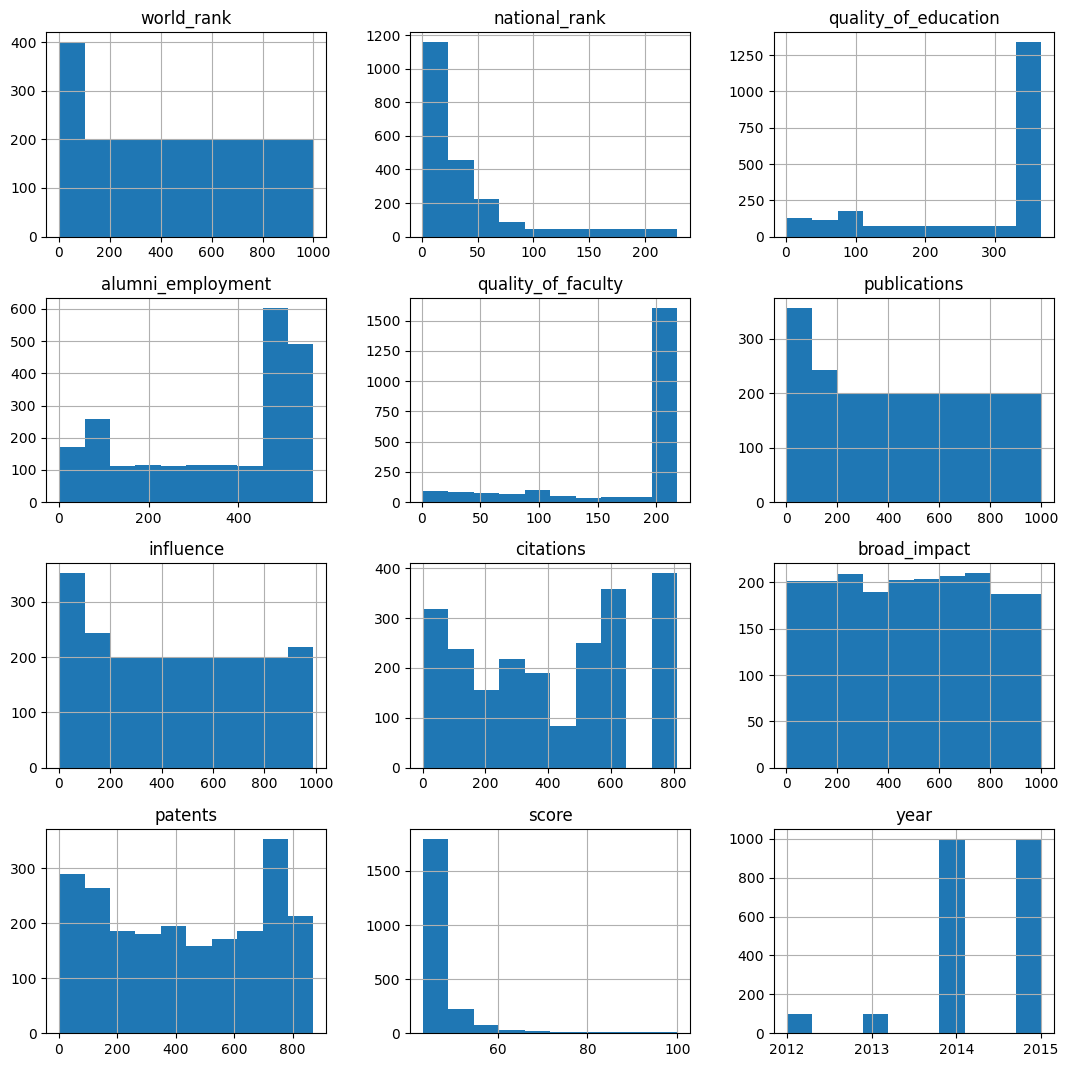

In [4]:
data.hist(figsize=(13,13))
plt.show()

Задача №15 - для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "возведение в степень".

In [5]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=50)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], plot=plt)
    plt.show()

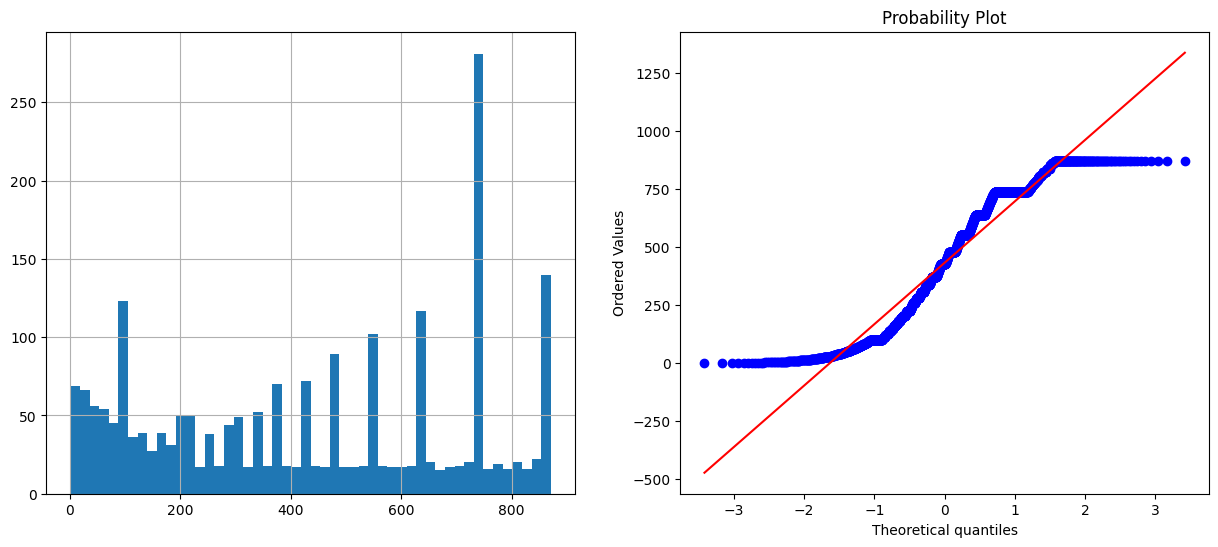

In [6]:
diagnostic_plots(data, 'patents')

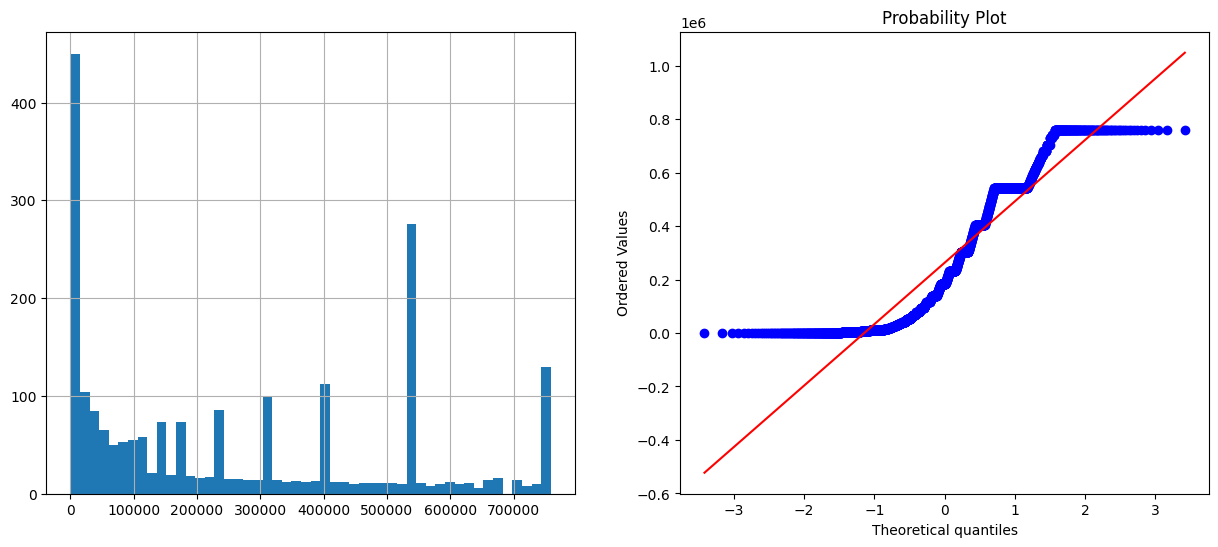

In [7]:
data['patents2'] = data['patents']**(2)
diagnostic_plots(data, 'patents2')

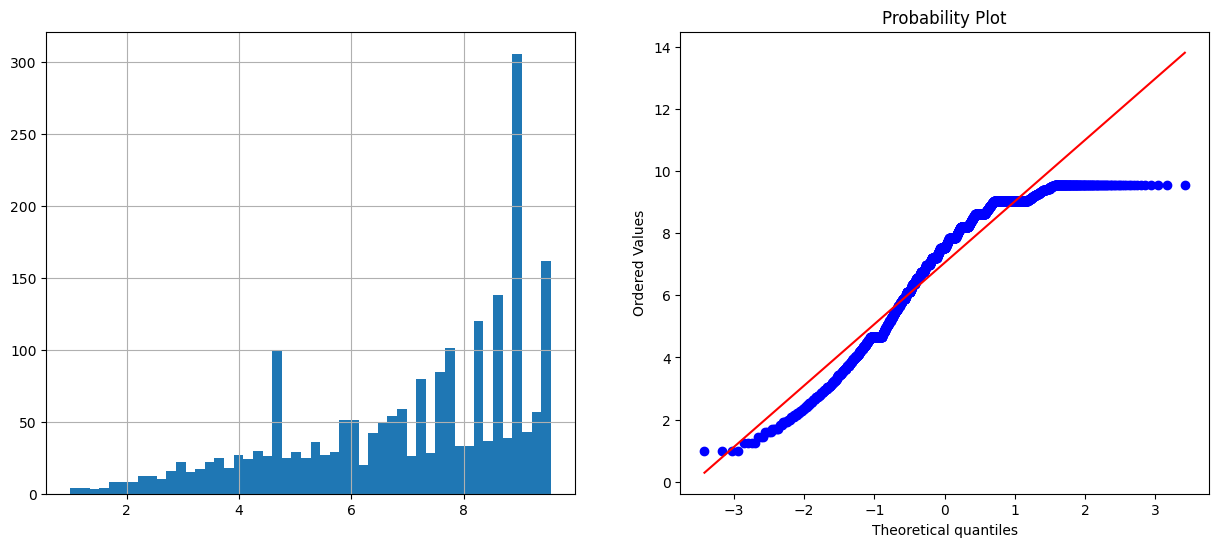

In [8]:
data['patents2'] = data['patents']**(1/3)
diagnostic_plots(data, 'patents2')

Задача №35 - Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод вложений (embedded method). Используйте подход на основе дерева решений.

In [9]:
half_data = data.copy()
half_data

world_rank                            institution         country  \
0              1                     Harvard University             USA   
1              2  Massachusetts Institute of Technology             USA   
2              3                    Stanford University             USA   
3              4                University of Cambridge  United Kingdom   
4              5     California Institute of Technology             USA   
...          ...                                    ...             ...   
2195         996              University of the Algarve        Portugal   
2196         997                  Alexandria University           Egypt   
2197         998            Federal University of Ceará          Brazil   
2198         999                 University of A Coruña           Spain   
2199        1000        China Pharmaceutical University           China   

      national_rank  quality_of_education  alumni_employment  \
0                 1                     7                  9   
1                 2                     9                 17   
2                 3                    17                 11   
3                 1                    10                 24   
4                 4                     2                 29   
...             ...                   ...                ...   
2195              7                   367                567   
2196              4                   236                566   
2197             18                   367                549   
2198             40                   367                567   
2199             83                   367                567   

      quality_of_faculty  publications  influence  citations  broad_impact  \
0                      1             1          1          1           NaN   
1                      3            12          4          4           NaN   
2                      5             4          2          2           NaN   
3                      4            16         16         11           NaN   
4                      7            37         22         22           NaN   
...                  ...           ...        ...        ...           ...   
2195                 218           926        845        812         969.0   
2196                 218           997        908        645         981.0   
2197                 218           830        823        812         975.0   
2198                 218           886        974        812         975.0   
2199                 218           861        991        812         981.0   

      patents   score  year  patents2  
0           5  100.00  2012  1.709976  
1           1   91.67  2012  1.000000  
2          15   89.50  2012  2.466212  
3          50   86.17  2012  3.684031  
4          18   85.21  2012  2.620741  
...       ...     ...   ...       ...  
2195      816   44.03  2015  9.344657  
2196      871   44.03  2015  9.550059  
2197      824   44.03  2015  9.375096  
2198      651   44.02  2015  8.666831  
2199      547   44.02  2015  8.178289  

[2200 rows x 15 columns]

Удалим текстовые столбцы (от этого может потеряться смысл процедуры отбора признаков, однако считаю необходимым их удалить для упрощения выполнения задания). Также удалим строки с пустыми значениями.

In [10]:
half_data = data.dropna(axis=0,how='any')
half_data.pop('institution')
half_data.pop('country')
(data.shape, half_data.shape)

((2200, 15), (2000, 13))

In [11]:
half_data.dtypes

world_rank                int64
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
patents2                float64
dtype: object

все данные представлены в числовом виде, теперь можно производить процедуру отбора признаков. определим целевой признак "world_rank"

In [12]:
x = half_data.copy()
x = x.drop(columns='world_rank')
x

national_rank  quality_of_education  alumni_employment  \
200               1                     1                  1   
201               2                    11                  2   
202               3                     3                 11   
203               1                     2                 10   
204               2                     7                 12   
...             ...                   ...                ...   
2195              7                   367                567   
2196              4                   236                566   
2197             18                   367                549   
2198             40                   367                567   
2199             83                   367                567   

      quality_of_faculty  publications  influence  citations  broad_impact  \
200                    1             1          1          1           1.0   
201                    4             5          3          3           4.0   
202                    2            15          2          2           2.0   
203                    5            10          9         12          13.0   
204                   10            11         12         11          12.0   
...                  ...           ...        ...        ...           ...   
2195                 218           926        845        812         969.0   
2196                 218           997        908        645         981.0   
2197                 218           830        823        812         975.0   
2198                 218           886        974        812         975.0   
2199                 218           861        991        812         981.0   

      patents   score  year  patents2  
200         2  100.00  2014  1.259921  
201         6   99.09  2014  1.817121  
202         1   98.69  2014  1.000000  
203        48   97.64  2014  3.634241  
204        16   97.51  2014  2.519842  
...       ...     ...   ...       ...  
2195      816   44.03  2015  9.344657  
2196      871   44.03  2015  9.550059  
2197      824   44.03  2015  9.375096  
2198      651   44.02  2015  8.666831  
2199      547   44.02  2015  8.178289  

[2000 rows x 12 columns]

In [13]:
y = half_data['world_rank']
y

200        1
201        2
202        3
203        4
204        5
        ... 
2195     996
2196     997
2197     998
2198     999
2199    1000
Name: world_rank, Length: 2000, dtype: int64

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
dtc1 = DecisionTreeRegressor()
dtc1.fit(x,y)
dtc1.feature_importances_, sum(dtc1.feature_importances_)

(array([9.90871501e-05, 2.69901988e-04, 4.43104786e-03, 1.16170347e-03,
        5.00205881e-04, 7.90119932e-05, 3.22699586e-04, 1.07505571e-01,
        1.73197383e-03, 8.79763045e-01, 3.87762846e-03, 2.58123120e-04]),
 1.0)

In [16]:
dtc1 = DecisionTreeRegressor()
dtc1.fit(x,y)
dtc1.feature_importances_, sum(dtc1.feature_importances_)

(array([5.65400814e-05, 6.84475338e-04, 4.55740026e-03, 2.11883370e-04,
        5.31277246e-04, 6.06999677e-05, 4.42892292e-05, 1.07503764e-01,
        1.25357755e-03, 8.79663712e-01, 4.69333057e-03, 7.39050550e-04]),
 0.9999999999999999)

In [17]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.1, b+0.005, str(round(b,3)))
    plt.show()
    return labels, data

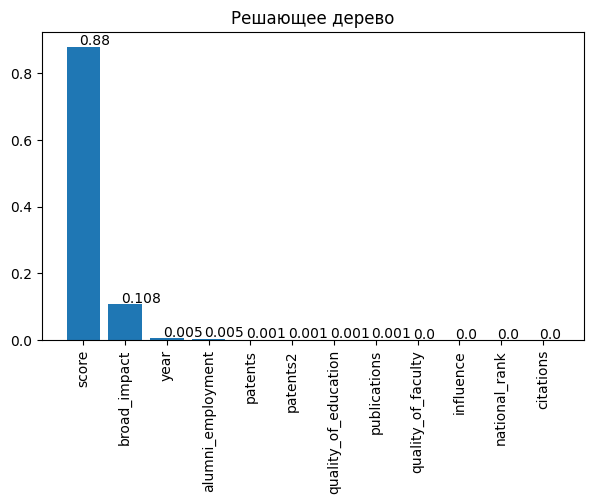

In [18]:
_,_=draw_feature_importances(dtc1, x, 'Решающее дерево')

Таким образом, можно сказать, что отбор ведётся по признакам score и broad_impact

Дополнительное задание для группы ИУ5-21М: Для студентов групп ИУ5-21М, ИУ5И-21М, ИУ5Ц-21М - для пары произвольных колонок данных построить график "Диаграмма рассеяния".

In [4]:
%pip install seaborn

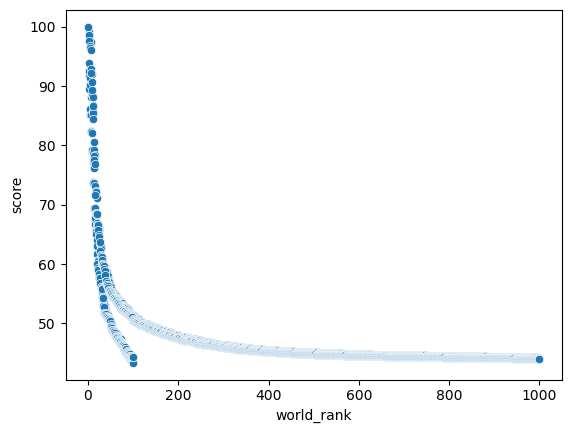

In [5]:
import seaborn as sns
sns.scatterplot(data=data, x="world_rank", y="score")
plt.show()

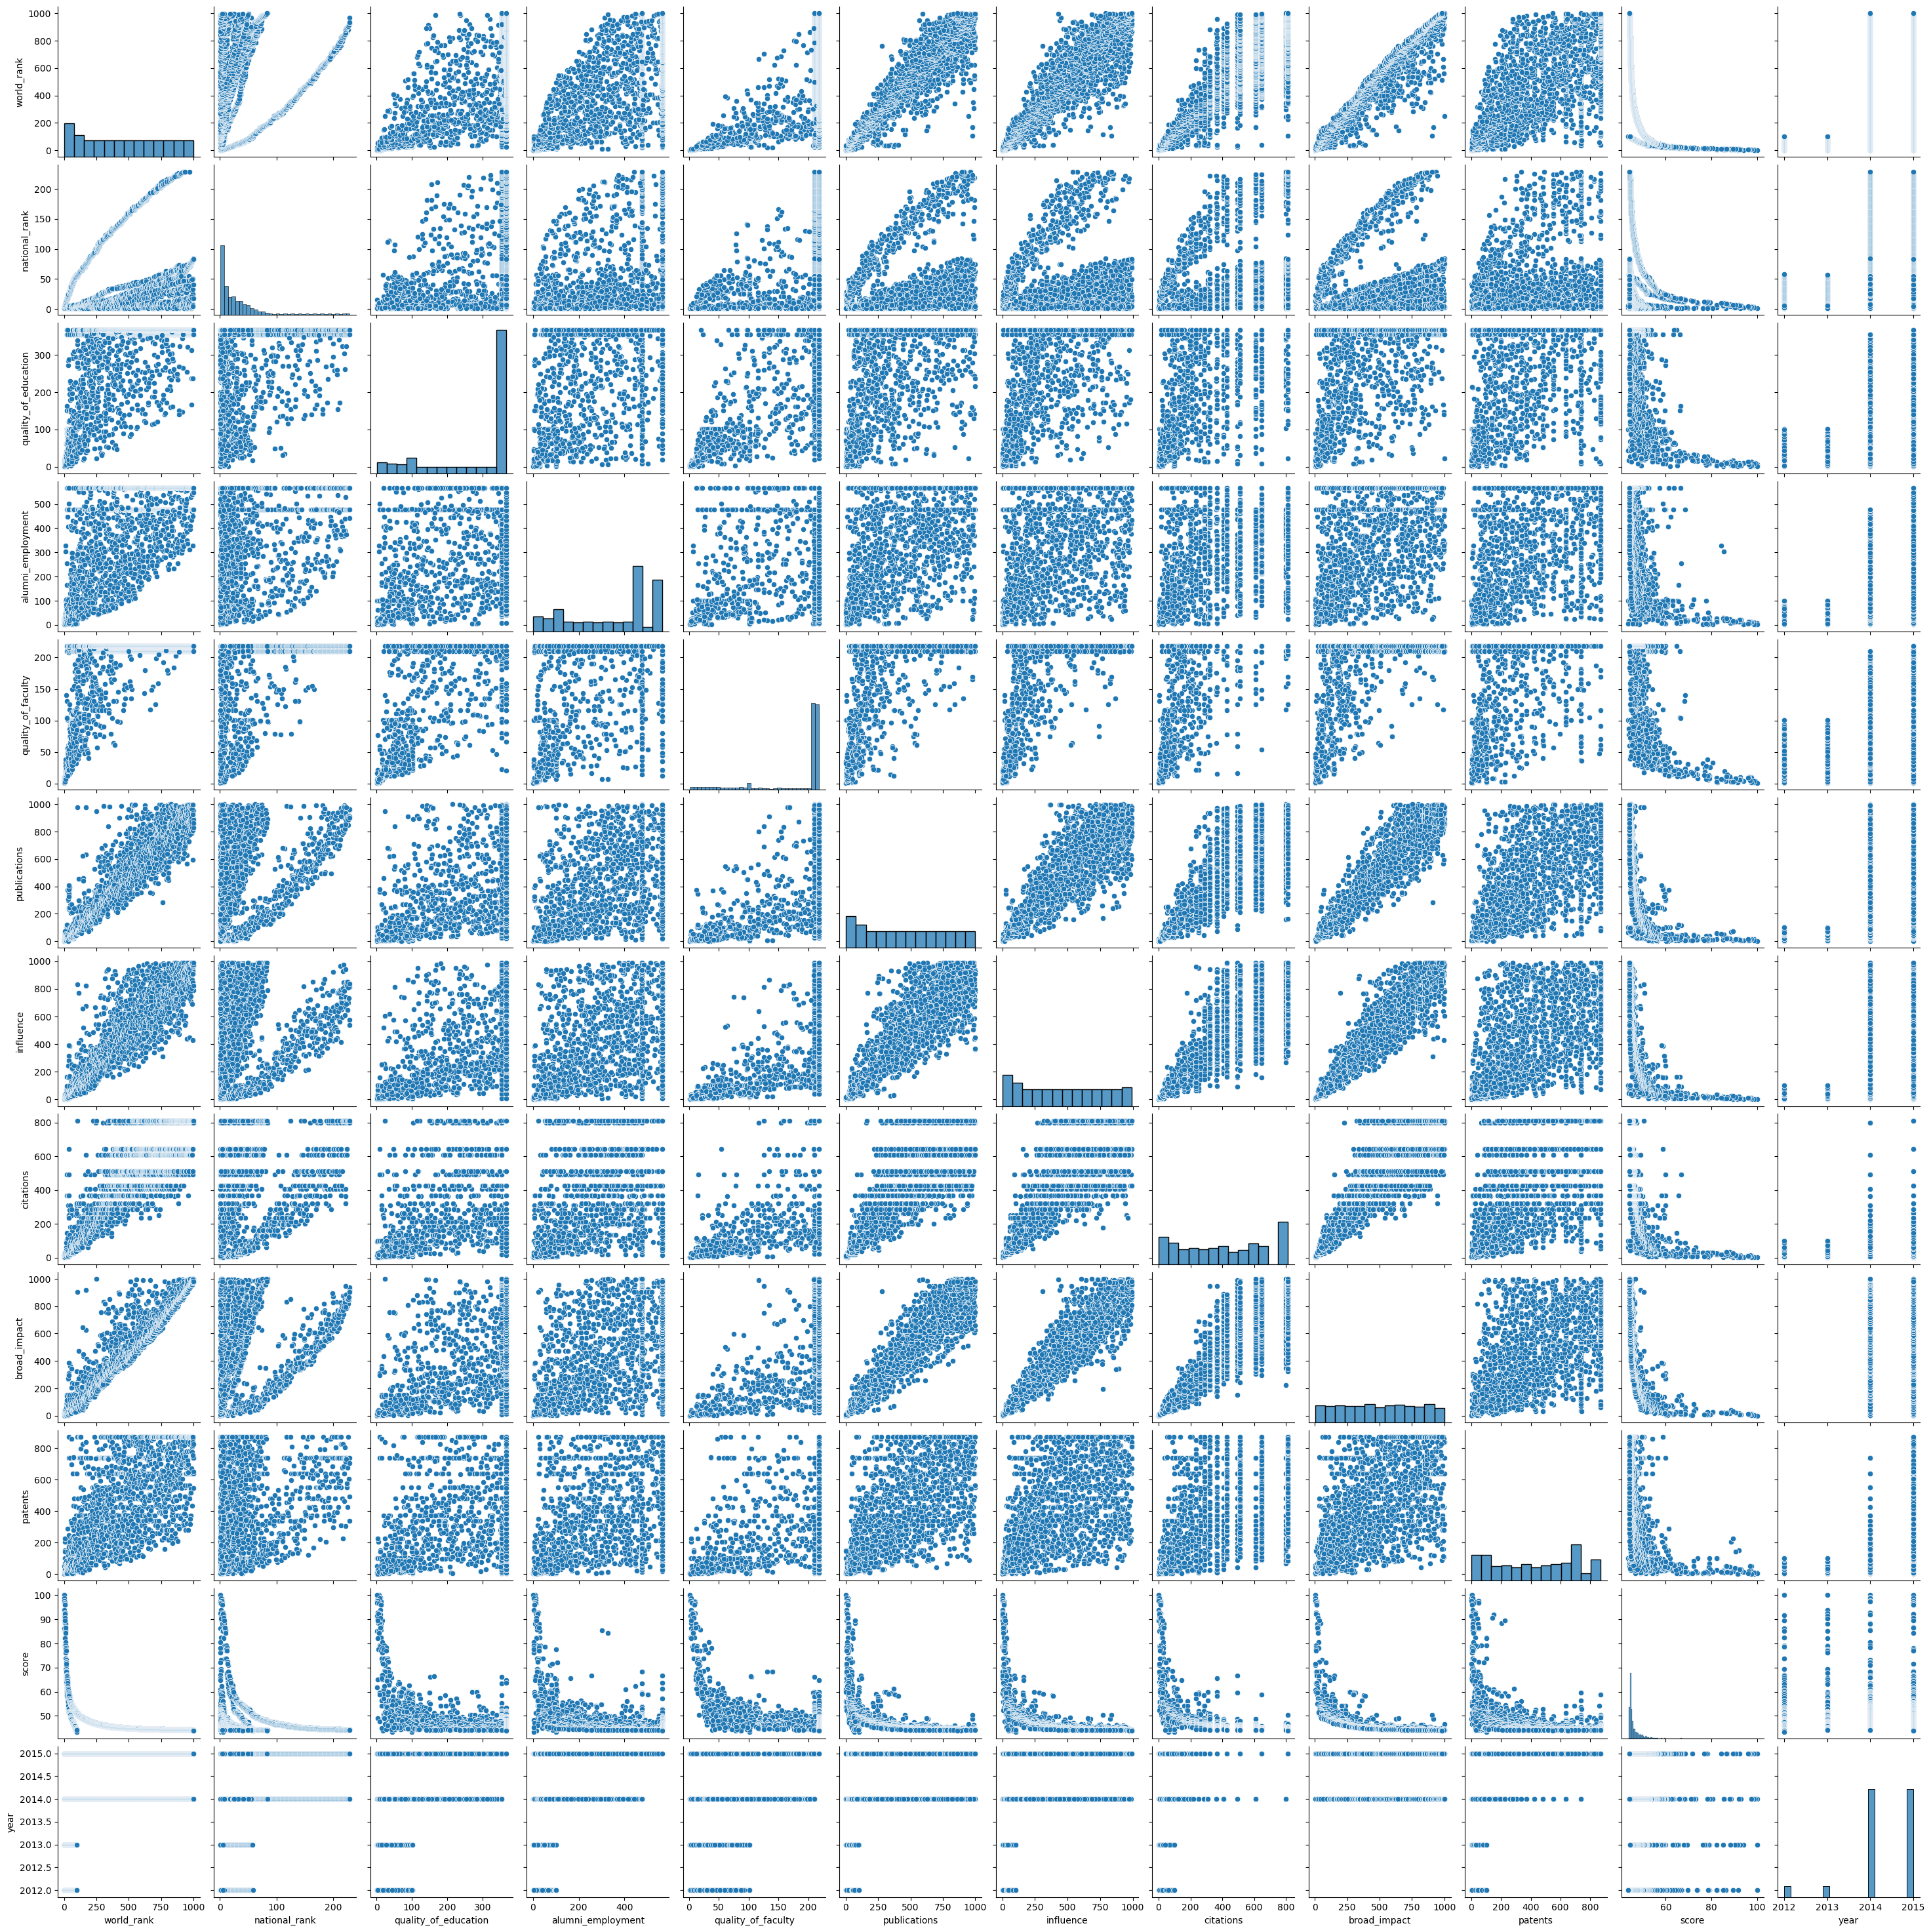

In [6]:
sns.pairplot(data)